**Only for students in CSCI 580, Fall 2024. Do not share**
---

## Solution to the Decision Tree Problem in the Mideterm Exam

You want to predict whether a customer will **Buy** or **Not Buy** a product based on two attributes:
1. **Income** (Low, High)
2. **Age** (≤30, 31–50, >50)

| Income  | Age  | Buy?    |
|---------|------|---------|
| Low     | ≤30  | No      |
| Low     | 31–50| No      |
| High    | ≤30  | Yes     |
| High    | 31–50| No      |
| High    | >50  | Yes     |
| Low     | >50  | No      |
| High    | >50  | Yes     |

### Step 1: Compute Gini Index for the Dataset

To begin, we calculate the Gini index for the entire dataset.

- **Total instances = 7**
- **No = 4, Yes = 3**

Gini index for the whole dataset:
$$
Gini = 1 - \left(\frac{4}{7}\right)^2 - \left(\frac{3}{7}\right)^2 = 1 - 0.327 - 0.184 = 0.489
$$

### Step 2: Compute Gini Index for Each Attribute

#### **Attribute 1: Income**
We split the data based on two values of Income (Low, High).

##### Subgroup 1: Income = Low
- **Total instances = 3**
- **No = 3, Yes = 0**

Gini index:
$$
Gini_{\text{Low}} = 1 - \left(\frac{3}{3}\right)^2 - \left(\frac{0}{3}\right)^2 = 1 - 1 = 0
$$

##### Subgroup 2: Income = High
- **Total instances = 4**
- **No = 1, Yes = 3**

Gini index:
$$
Gini_{\text{High}} = 1 - \left(\frac{1}{4}\right)^2 - \left(\frac{3}{4}\right)^2 = 1 - 0.0625 - 0.5625 = 0.375
$$

##### Weighted Gini for Income:
$$
\text{Weighted Gini} = \left(\frac{3}{7} \times 0\right) + \left(\frac{4}{7} \times 0.375\right) = 0 + 0.214 = 0.214
$$

#### **Attribute 2: Age**
Now we calculate the Gini index for splits based on Age.

##### Subgroup 1: Age ≤ 30
- **Total instances = 2**
- **No = 1, Yes = 1**

Gini index:
$$
Gini_{\text{≤30}} = 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 = 1 - 0.25 - 0.25 = 0.5
$$

##### Subgroup 2: Age 31–50
- **Total instances = 2**
- **No = 2, Yes = 0**

Gini index:
$$
Gini_{\text{31–50}} = 1 - \left(\frac{2}{2}\right)^2 - \left(\frac{0}{2}\right)^2 = 1 - 1 = 0
$$

##### Subgroup 3: Age > 50
- **Total instances = 3**
- **No = 1, Yes = 2**

Gini index:
$$
Gini_{\text{>50}} = 1 - \left(\frac{1}{3}\right)^2 - \left(\frac{2}{3}\right)^2 = 1 - 0.111 - 0.444 = 0.444
$$

##### Weighted Gini for Age:
$$
\text{Weighted Gini} = \left(\frac{2}{7} \times 0.5\right) + \left(\frac{2}{7} \times 0\right) + \left(\frac{3}{7} \times 0.444\right) = 0.143 + 0 + 0.190 = 0.333
$$

### Step 3: Choose Attribute with Lowest Gini Index
- **Weighted Gini for Income** = 0.214
- **Weighted Gini for Age** = 0.333

Since **Income** has the lowest Gini index, we choose **Income** as the first attribute to split the dataset.

### Step 4: Split Based on Income
- For **Income = Low**, the Gini is 0, so we create a leaf node: **No** (because all customers with low income did not buy).
- For **Income = High**, we need to split further using the **Age** attribute (since this group is impure).

### Step 5: Further Split Based on Age (for High Income only, because Low Income was split out already)
Now we split the **Income = High** group based on **Age**:
- **Age ≤ 30**: Gini = 0 (Yes), create a leaf node: **Yes**
- **Age 31–50**: Gini = 0 (No), create a leaf node: **No**
- **Age > 50**: Gini = 0 (Yes), create a leaf node: **Yes**

Alternatively, we can make a binary split here:
- **Age 31–50**: Gini = 0 (No), create a leaf node: **No**
- **Otherwise**: Gini = 0 (Yes), create a leaf node: **Yes**

### Final Decision Tree:

```
               Income
              /     \
           Low      High
           No     /  |  \
               ≤30 31–50 >50
               Yes   No   Yes
```
or
```
               Income
              /     \
           Low      High
           No      /    \
                31–50   other
                 No      Yes
```


### Explanation:
- If a customer has **Low income**, they will not buy.
- If a customer has **High income**, the decision depends on their age:
  - If their **Age ≤ 30** or **Age > 50**, they will buy.
  - If their **Age is 31–50**, they will not buy.

This solution illustrates how Gini index and weighted Gini are used to split the dataset and construct a decision tree.

## Answer and Experiemental Code for MCQ#9

9. How does decreasing the temperature in softmax search affect the behavior of the algorithm?
- A) It makes the search more random
- **B**) It makes the search more deterministic
- C) It increases the likelihood of selecting suboptimal actions
- D) It has no effect on the search behavior

X values can be the scores of the next game play step. Higher score indicates better next step (in game play). When temperature is low, high score gets higher probability - the algorithm always picks the high score the next step, that is, more **deterministic**.

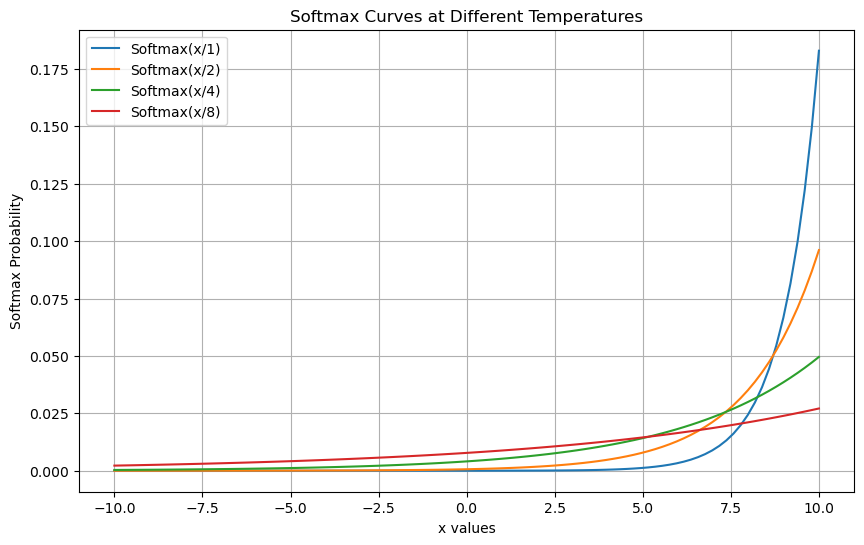

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate softmax probabilities
def softmax(scores, temperature):
    exp_scores = np.exp(scores / temperature)
    return exp_scores / np.sum(exp_scores)
    
# Define a range of x values
x_values = np.linspace(-10, 10, 100)

# Plot softmax for different temperature values
def plot_softmax_curves(x_values):
    temperatures = [1, 2, 4, 8]  # Simulate different temperature settings
    plt.figure(figsize=(10, 6))
    
    for t in temperatures:
        softmax_values = softmax(x_values, t)
        plt.plot(x_values, softmax_values, label=f'Softmax(x/{t})')

    plt.title('Softmax Curves at Different Temperatures')
    plt.xlabel('x values')
    plt.ylabel('Softmax Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the softmax curves
plot_softmax_curves(x_values)